# Statement
size of dataset: 1872 images scraped from Google with 7 keywords(abandoned street in istanbul, ancient street in istanbul, istanbul street view, rich street in istanbul, slum street in istanbul, street element in istanbul, street life in istanbul) and 1147 images scraped from Instagram with 4 keywords(Colourful_Istanbul, Istanbul, Istanbul_streetlife, Istanbul_streets)

how I gathered data: I used data scraping skills to scrape these data from Google and Instagram

datatype of the dataset: image format such as JPEG, PNG, GIF, WEBP

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install tensorflow

  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp39-cp39-win_amd64.whl (272.8 MB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached jax-0.4.8-py3-none-any.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.54.0-cp39-cp39-win_amd64.whl (4.1 MB)
  Using cached h5py-3.8.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached ml_dtypes-0.1.0-cp39-cp39-win_amd64.whl (120 kB)
  Using cached Markdown-3.4.3-py3-none-any.whl (93 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached google_auth-2.17.3-py2.py3-none-any.whl (178 kB)
  Using cached pyasn1_modules-0.3.0-py2.p

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
moviepy 1.0.3 requires imageio<3.0,>=2.5; python_version >= "3.4", which is not installed.
segregation 2.1.0 requires quilt3, which is not installed.
osmnx 1.2.2 requires requests>=2.28, but you have requests 2.25.1 which is incompatible.


In [3]:
import tensorflow

In [4]:
import tensorflow as tf
import PIL
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np
from PIL import Image
import networkx as nx
from sklearn.neighbors import NearestNeighbors
from IPython.display import Image as iImage
from IPython.display import display
import math
import shutil

In [5]:
# Return the (g,h) index of the BMU in the grid
def find_BMU(SOM,x):
    distSq = (np.square(SOM - x)).sum(axis=2)
    return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape)
    
# Update the weights of the SOM cells when given a single training example
# and the model parameters along with BMU coordinates as a tuple
def update_weights(SOM, train_ex, learn_rate, radius_sq, 
                   BMU_coord, step=3):
    g, h = BMU_coord
    #if radius is close to zero then only BMU is changed
    if radius_sq < 1e-3:
        SOM[g,h,:] += learn_rate * (train_ex - SOM[g,h,:])
        return SOM
    # Change all cells in a small neighborhood of BMU
    for i in range(max(0, g-step), min(SOM.shape[0], g+step)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step)):
            dist_sq = np.square(i - g) + np.square(j - h)
            dist_func = np.exp(-dist_sq / 2 / radius_sq)
            SOM[i,j,:] += learn_rate * dist_func * (train_ex - SOM[i,j,:])   
    return SOM    

# Main routine for training an SOM. It requires an initialized SOM grid
# or a partially trained grid as parameter
def train_SOM(SOM, train_data, learn_rate = .1, radius_sq = 1, 
             lr_decay = .1, radius_decay = .1, epochs = 10):    
    learn_rate_0 = learn_rate
    radius_0 = radius_sq
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)      
        for train_ex in train_data:
            g, h = find_BMU(SOM, train_ex)
            SOM = update_weights(SOM, train_ex, 
                                 learn_rate, radius_sq, (g,h))
        # Update learning rate and radius
        learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
        radius_sq = radius_0 * np.exp(-epoch * radius_decay)            
    return SOM

In [7]:
pictures = os.listdir('C:/Users/user/Documents/SOM/images')
for i in pictures[0:3000]:
    shutil.copy('C:/Users/user/Documents/SOM/images/'+i, 'Istanbulimages')

In [8]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [9]:
def processImage(imagePath, model):
    im = load_image(imagePath)
    f = model.predict(im)[0]
    return f

In [10]:
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

17225924/17225924 [==============================] - 1s 0us/step


In [11]:
pictures = os.listdir('images')

In [12]:
pictures

['abandonedstreetinistanbul0.jpeg',
 'abandonedstreetinistanbul1.jpeg',
 'abandonedstreetinistanbul10.jpeg',
 'abandonedstreetinistanbul100.jpeg',
 'abandonedstreetinistanbul101.jpeg',
 'abandonedstreetinistanbul102.jpeg',
 'abandonedstreetinistanbul103.jpeg',
 'abandonedstreetinistanbul104.jpeg',
 'abandonedstreetinistanbul105.jpeg',
 'abandonedstreetinistanbul106.jpeg',
 'abandonedstreetinistanbul107.jpeg',
 'abandonedstreetinistanbul108.jpeg',
 'abandonedstreetinistanbul109.jpeg',
 'abandonedstreetinistanbul11.jpeg',
 'abandonedstreetinistanbul110.jpeg',
 'abandonedstreetinistanbul111.jpeg',
 'abandonedstreetinistanbul112.jpeg',
 'abandonedstreetinistanbul113.jpeg',
 'abandonedstreetinistanbul114.jpeg',
 'abandonedstreetinistanbul115.jpeg',
 'abandonedstreetinistanbul116.jpeg',
 'abandonedstreetinistanbul117.jpeg',
 'abandonedstreetinistanbul118.jpeg',
 'abandonedstreetinistanbul119.jpeg',
 'abandonedstreetinistanbul12.jpeg',
 'abandonedstreetinistanbul120.jpeg',
 'abandonedstreetin

In [13]:
pictures.sort(key = lambda x:(x.split('.')[0]))

In [14]:
pictures

['abandonedstreetinistanbul0.jpeg',
 'abandonedstreetinistanbul1.jpeg',
 'abandonedstreetinistanbul10.jpeg',
 'abandonedstreetinistanbul100.jpeg',
 'abandonedstreetinistanbul101.jpeg',
 'abandonedstreetinistanbul102.jpeg',
 'abandonedstreetinistanbul103.jpeg',
 'abandonedstreetinistanbul104.jpeg',
 'abandonedstreetinistanbul105.jpeg',
 'abandonedstreetinistanbul106.jpeg',
 'abandonedstreetinistanbul107.jpeg',
 'abandonedstreetinistanbul108.jpeg',
 'abandonedstreetinistanbul109.jpeg',
 'abandonedstreetinistanbul11.jpeg',
 'abandonedstreetinistanbul110.jpeg',
 'abandonedstreetinistanbul111.jpeg',
 'abandonedstreetinistanbul112.jpeg',
 'abandonedstreetinistanbul113.jpeg',
 'abandonedstreetinistanbul114.jpeg',
 'abandonedstreetinistanbul115.jpeg',
 'abandonedstreetinistanbul116.jpeg',
 'abandonedstreetinistanbul117.jpeg',
 'abandonedstreetinistanbul118.jpeg',
 'abandonedstreetinistanbul119.jpeg',
 'abandonedstreetinistanbul12.jpeg',
 'abandonedstreetinistanbul120.jpeg',
 'abandonedstreetin

In [15]:
features = []
for m in pictures:
    path = os.path.join('images', m)
    f = processImage(path, model)
    features.append(f)

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 30ms/step


In [16]:
featureImagePairs = []
for i in range(len(features)):
    featureImage = {}
    featureImage['image'] = pictures[i]
    featureImage['feature'] = features[i]
    featureImagePairs.append(featureImage)

In [17]:
# Dimensions of the SOM grid
m = 10
n = 10
# Number of training examples
n_x = 10000
rand = np.random.RandomState(0)
# Initialize the training data
train_data = features
# Initialize the SOM randomly
SOM = rand.uniform(0, 6, (m, n, 1024)).astype(float)
# Display both the training matrix and the SOM grid
"""fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(50, 60, 3))
ax[0].title.set_text('Training Data')
ax[1].imshow(SOM.astype(int))
ax[1].title.set_text('Randomly Initialized SOM Grid')"""

"fig, ax = plt.subplots(\n    nrows=1, ncols=2, figsize=(12, 3.5), \n    subplot_kw=dict(xticks=[], yticks=[]))\nax[0].imshow(train_data.reshape(50, 60, 3))\nax[0].title.set_text('Training Data')\nax[1].imshow(SOM.astype(int))\nax[1].title.set_text('Randomly Initialized SOM Grid')"

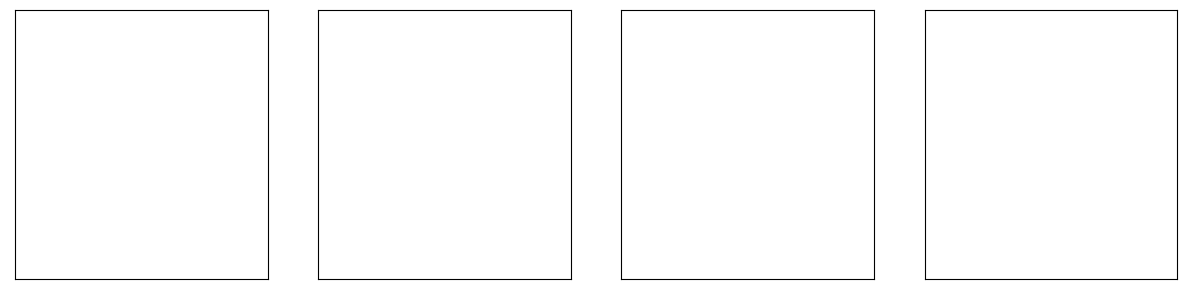

In [18]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 10
for epochs, i in zip([1, 4, 5, 10], range(0,9)):
    total_epochs += epochs
    SOM = train_SOM(SOM, train_data, learn_rate = .05, radius_sq = 0.5, 
             lr_decay = .05, radius_decay = .05, epochs = 50)

In [19]:
find_BMU(SOM, featureImagePairs[0]['feature'])

(3, 6)

In [20]:
SOMimages = []
for i in range(10):
    row = []
    for j in range(10):
        row.append([])
    SOMimages.append(row)

In [21]:
for fi in featureImagePairs:
    g,h = find_BMU(SOM,fi['feature'])
    SOMimages[g][h].append(fi)

In [22]:
SOMimages

[[[{'image': 'abandonedstreetinistanbul190.jpeg',
    'feature': array([0.80986196, 2.6135032 , 0.92484003, ..., 0.00379383, 0.08016657,
           0.        ], dtype=float32)},
   {'image': 'accientstreetinistanbul258.jpeg',
    'feature': array([0.51276255, 0.81782454, 0.29904535, ..., 0.39353228, 0.39654565,
           0.        ], dtype=float32)},
   {'image': 'accientstreetinistanbul295.jpeg',
    'feature': array([0.31121585, 3.312265  , 0.        , ..., 0.21061033, 0.20915967,
           0.        ], dtype=float32)},
   {'image': 'image123.jpeg',
    'feature': array([0.1267046 , 1.4600041 , 0.06574275, ..., 1.2249902 , 0.        ,
           0.39538464], dtype=float32)},
   {'image': 'image158 (4).jpeg',
    'feature': array([0.6456409 , 1.8351609 , 0.68134606, ..., 0.39456096, 0.0731868 ,
           0.6461237 ], dtype=float32)},
   {'image': 'image159 (4).jpeg',
    'feature': array([0.1433127 , 1.6551539 , 0.9622854 , ..., 1.136582  , 0.38129276,
           0.77897906], dtype

In [23]:
from scipy import spatial

imageGrid = []
for g in range(len(SOMimages)):
    row = SOMimages[g]
    for h in range(len(row)):
        cell = row[h]
        if len(cell) > 0:
            tree = spatial.KDTree([d['feature'] for d in cell])
            bmd = tree.query(SOM[g][h])
            imageGrid.append(cell[bmd[1]]['image'])
        else:
            imageGrid.append('white.png')

In [24]:
def img_reshape(img):
    img = Image.open('images/'+img).convert('RGB')
    img = img.resize((100,100))
    img = np.asarray(img)
    return img

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

img_arr = []
for image in imageGrid:
    img_arr.append(img_reshape(image))

fig = plt.figure(figsize=(100., 100.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(10, 10),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes
                 )

for ax, im in zip(grid, img_arr):
    ax.imshow(im)

plt.savefig('my_plot.png')  # save the plot to a file named "my_plot.png"
plt.show()

In [26]:
somName = 'SOM'
os.mkdir(somName)
for g in range(len(SOMimages)):
    row = SOMimages[g]
    for h in range(len(row)):
        folder = str(g)+'_'+str(h)
        os.mkdir(somName+'/'+folder)

In [27]:
for g in range(len(SOMimages)):
    row = SOMimages[g]
    for h in range(len(row)):
        cell = row[h]
        folder = str(g)+'_'+str(h)
        for i in cell:
            shutil.copy('images/'+i['image'], somName+'/'+folder)